Importar Librerias

In [24]:
import pandas as pd
import ast
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns

Leemos el archivo JSON e importamos a un dataframe

In [ ]:
rows = []

with open ('australian_users_items.json', encoding='MacRoman') as f:
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

df_games_items = pd.DataFrame(rows)

In [25]:
dfoutput= pd.read_csv(r"output.csv")

C:\Users\TOCALACTEOS\AppData\Local\Temp\ipykernel_6980\1857957644.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dfoutput= pd.read_csv(r"output.csv")


verificamos el tipo de dato 

In [26]:
dfoutput.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24064 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


verificamos filas duplicadas 

In [27]:

duplicados = dfoutput[dfoutput.duplicated()]

cantidad_duplicados = len(duplicados)

if cantidad_duplicados == 0:
    print("No se encontraron filas duplicadas.")
else:
    print(f"Se encontraron {cantidad_duplicados} filas duplicadas:")
    print(duplicados)

Se encontraron 88309 filas duplicadas:
      publisher genres app_name title  url release_date tags reviews_url  \
1           NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
2           NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
3           NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
4           NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
5           NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
...         ...    ...      ...   ...  ...          ...  ...         ...   
88305       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
88306       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
88307       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
88308       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
88309       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   

      specs price  early_access  id developer  


eliminamos filas duplcadas y nulas 

In [28]:
# Eliminar filas duplicadas
dfoutput = dfoutput.drop_duplicates()

print("DataFrame original:")
print(dfoutput)
print("\nDataFrame sin filas duplicadas:")
print(dfoutput)

DataFrame original:
               publisher                                             genres  \
0                    NaN                                                NaN   
88310          Kotoshiro  ['Action', 'Casual', 'Indie', 'Simulation', 'S...   
88311   Making Fun, Inc.       ['Free to Play', 'Indie', 'RPG', 'Strategy']   
88312       Poolians.com  ['Casual', 'Free to Play', 'Indie', 'Simulatio...   
88313               彼岸领域                  ['Action', 'Adventure', 'Casual']   
...                  ...                                                ...   
120440   Ghost_RUS Games      ['Casual', 'Indie', 'Simulation', 'Strategy']   
120441            Sacada                    ['Casual', 'Indie', 'Strategy']   
120442      Laush Studio                  ['Indie', 'Racing', 'Simulation']   
120443          SIXNAILS                                ['Casual', 'Indie']   
120444               NaN                                                NaN   

                        app_nam

verificamos el tipo de dato

In [29]:

def verificar_tipo_datos(dfoutput):
    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": []}
    for columna in dfoutput.columns:
        porcentaje_no_nulos = (dfoutput[columna].count() / len(dfoutput)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(dfoutput[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
    df_info = pd.DataFrame(mi_dict)
    for columna in dfoutput.columns:
        print(columna, " (nulos) = ", dfoutput[columna].isnull().sum())
    print("\nfilas completamente nulas: ", dfoutput.isna().all(axis=1).sum())
    return df_info 
df_info = verificar_tipo_datos(dfoutput)
print(df_info)

publisher  (nulos) =  8072
genres  (nulos) =  3284
app_name  (nulos) =  3
title  (nulos) =  2051
url  (nulos) =  1
release_date  (nulos) =  2068
tags  (nulos) =  164
reviews_url  (nulos) =  3
specs  (nulos) =  671
price  (nulos) =  1378
early_access  (nulos) =  1
id  (nulos) =  3
developer  (nulos) =  3300

filas completamente nulas:  1
    nombre_campo                        tipo_datos  no_nulos_%  nulos_%
0      publisher  [<class 'float'>, <class 'str'>]       74.88    25.12
1         genres  [<class 'float'>, <class 'str'>]       89.78    10.22
2       app_name  [<class 'float'>, <class 'str'>]       99.99     0.01
3          title  [<class 'float'>, <class 'str'>]       93.62     6.38
4            url  [<class 'float'>, <class 'str'>]      100.00     0.00
5   release_date  [<class 'float'>, <class 'str'>]       93.56     6.44
6           tags  [<class 'float'>, <class 'str'>]       99.49     0.51
7    reviews_url  [<class 'float'>, <class 'str'>]       99.99     0.01
8          sp

Se eliminan los registros nulos en la columna "id"

In [30]:
dfoutput.dropna(subset=['id'], inplace=True)

 Convertir la columna "id" de float a int

In [31]:
# Convertir la columna "id" de float a int
dfoutput["id"] = dfoutput["id"].astype(int)

# Convertir la columna "id" de int a str
dfoutput["id"] = dfoutput["id"].astype(str)

Se reemplazan los valores nulos para las columnas con variables categoricas con "sin_dato"

In [32]:
columns_to_fill = ["genres", "app_name", "tags", "specs", "developer", "price"]

dfoutput[columns_to_fill] = dfoutput[columns_to_fill].fillna("sin_dato")

In [33]:
dfoutput.head(1)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,0.0,761140,Kotoshiro


cambiamos el formato de la columna price

In [34]:
dfoutput["price_num"] = pd.to_numeric(dfoutput["price"], errors='coerce')
dfoutput["price_num"] = pd.to_numeric(dfoutput["price_num"], errors='coerce')
dfoutput["price_num"] = dfoutput["price_num"].fillna(0)

 Se redondean los valores en la columna "price_num" a dos decimales

In [35]:

dfoutput["price_num"] = dfoutput["price_num"].round(2)

 Se elimina la columna "price" del DataFrame


In [37]:
dfoutput.drop(columns=["price"], inplace=True)

 Se renombra la columna "price_num" a "price"


In [38]:

dfoutput.rename(columns={"price_num": "price"}, inplace=True)

In [39]:
dfoutput.head(1)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,early_access,id,developer,price
88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],0.0,761140,Kotoshiro,4.99


In [21]:

# Cambiar el nombre de la columna
dfoutput.rename(columns={'price_num': 'price'}, inplace=True)



In [22]:
dfoutput.head(1)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer,price
88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,0.0,761140,Kotoshiro,4.99


In [40]:
dfoutput.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32133 entries, 88310 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24063 non-null  object 
 1   genres        32133 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30084 non-null  object 
 4   url           32133 non-null  object 
 5   release_date  30067 non-null  object 
 6   tags          32133 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         32133 non-null  object 
 9   early_access  32133 non-null  float64
 10  id            32133 non-null  object 
 11  developer     32133 non-null  object 
 12  price         32133 non-null  float64
dtypes: float64(2), object(11)
memory usage: 3.4+ MB


Convertimos el formato de relase_date a fecha

In [46]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'review_desanidado_date' con una columna 'posted'
# que contiene fechas en el formato 'November 5 2011'

# Asegúrate de que la columna 'posted' sea de tipo string
dfoutput['release_date'] = dfoutput['release_date'].astype(str)

# Elimina espacios adicionales al principio y al final de cada fecha
dfoutput['release_date'] = dfoutput['release_date'].str.strip()

# Intenta convertir las fechas al formato datetime, manejando los errores como valores nulos
dfoutput['release_date'] = pd.to_datetime(dfoutput['release_date'], errors='coerce')

# Filtra las filas con fechas no nulas
dfoutput = dfoutput.dropna(subset=['release_date'])

# Luego, convierte las fechas al formato deseado (año/mes/día) como cadenas de texto
dfoutput['release_date'] = dfoutput['release_date'].dt.strftime('%Y/%m/%d')


In [47]:
dfoutput.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29782 entries, 88310 to 120443
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     23773 non-null  object 
 1   genres        29782 non-null  object 
 2   app_name      29782 non-null  object 
 3   title         29781 non-null  object 
 4   url           29782 non-null  object 
 5   release_date  29782 non-null  object 
 6   tags          29782 non-null  object 
 7   reviews_url   29782 non-null  object 
 8   specs         29782 non-null  object 
 9   early_access  29782 non-null  float64
 10  id            29782 non-null  object 
 11  developer     29782 non-null  object 
 12  price         29782 non-null  float64
dtypes: float64(2), object(11)
memory usage: 3.2+ MB


In [49]:
import pandas as pd

# Convertir la columna 'release_date' a datetime
dfoutput['release_date'] = pd.to_datetime(dfoutput['release_date'])

# Crear una nueva columna 'release_year' y extraer el año de 'release_date'
dfoutput['release_year'] = dfoutput['release_date'].dt.year



In [50]:
dfoutput.info(1)

<class 'pandas.core.frame.DataFrame'>
Index: 29782 entries, 88310 to 120443
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publisher     23773 non-null  object        
 1   genres        29782 non-null  object        
 2   app_name      29782 non-null  object        
 3   title         29781 non-null  object        
 4   url           29782 non-null  object        
 5   release_date  29782 non-null  datetime64[ns]
 6   tags          29782 non-null  object        
 7   reviews_url   29782 non-null  object        
 8   specs         29782 non-null  object        
 9   early_access  29782 non-null  float64       
 10  id            29782 non-null  object        
 11  developer     29782 non-null  object        
 12  price         29782 non-null  float64       
 13  release_year  29782 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(10)
memory usage: 3.3+ MB


extraemos el año de la columna relase_date

In [51]:

# Crear una nueva columna 'release_year' y extraer el año de 'release_date'
dfoutput['release_year'] = pd.to_datetime(dfoutput['release_date']).dt.year



In [52]:
dfoutput.head(1)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,early_access,id,developer,price,release_year
88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],0.0,761140,Kotoshiro,4.99,2018


Revisar valoresa tipicos para "release_year"

In [54]:
# Revisar valoresa tipicos para "release_year"

dfoutput["release_year"].sort_values(ascending=False)

101450    2021
102531    2019
109678    2019
102742    2019
120366    2018
          ... 
97556     1981
107428    1980
103155    1975
107412    1970
103157    1970
Name: release_year, Length: 29782, dtype: int32

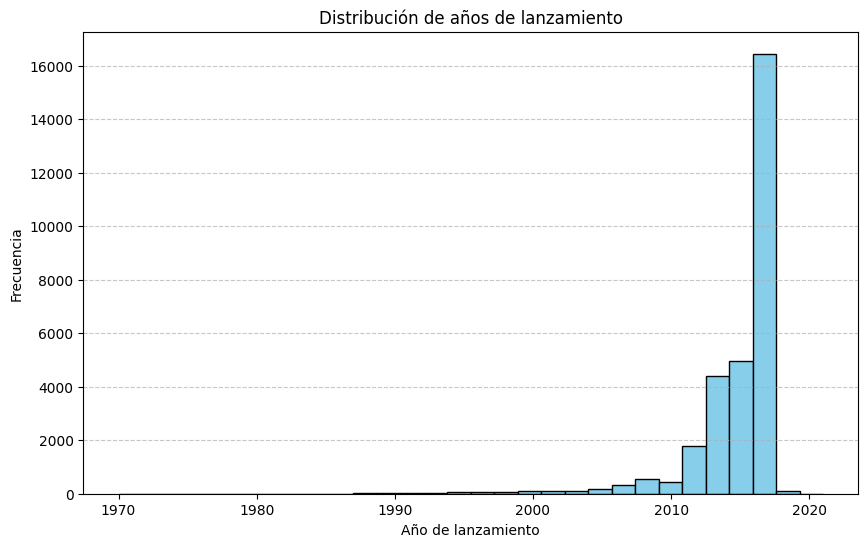

In [55]:
import matplotlib.pyplot as plt

# Ordena los valores de release_year en orden descendente
sorted_release_years = dfoutput["release_year"].sort_values(ascending=False)

# Crea un histograma
plt.figure(figsize=(10, 6))
plt.hist(sorted_release_years, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de años de lanzamiento')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


desanidamos output genres 

In [60]:
import pandas as pd
import ast

# Llenar los valores NaN en la columna 'genres' con una lista vacía
dfoutput['genres'].fillna('[]', inplace=True)

# Crear una lista para almacenar las filas desanidadas
new_rows = []

# Iterar a través del DataFrame original
for index, row in dfoutput.iterrows():
    try:
        genres_list = ast.literal_eval(row['genres'])
        if not isinstance(genres_list, list):
            genres_list = []
        for genre in genres_list:
            new_row = row.copy()
            new_row['genres'] = genre
            new_rows.append(new_row)
    except (SyntaxError, ValueError):
        # Handle the case where the 'genres' column contains invalid data
        pass

# Crear un nuevo DataFrame con las filas desanidadas
new_df = pd.DataFrame(new_rows)

# Ahora new_df contiene las filas desanidadas con 'genres' como columnas individuales


In [61]:
new_df.head(1)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,early_access,id,developer,price,release_year
88310,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],0.0,761140,Kotoshiro,4.99,2018


eliminamos columnas innecesarias para tener un dataframe mas limpio

In [62]:


# Lista de columnas a eliminar
columnas_a_eliminar = ['publisher', 'app_name', 'title', 'tags', 'specs', 'early_access']

# Eliminar varias columnas a la vez
new_df = new_df.drop(columnas_a_eliminar, axis=1)




In [63]:
new_df.head(1)

,genres,url,release_date,reviews_url,id,developer,price,release_year
88310,Action,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,761140,Kotoshiro,4.99,2018


renombramos columna id para hacer los inner con las demas tablas 

In [64]:

# Cambiar el nombre de la columna
new_df.rename(columns={'id': 'item_id'}, inplace=True)

In [65]:
new_df.head(1)

,genres,url,release_date,reviews_url,item_id,developer,price,release_year
88310,Action,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,761140,Kotoshiro,4.99,2018


guardamos el archivo en csv 

In [66]:
new_df.to_csv('output_desanidado.csv', index=False)